## Pandas

*pandas* is a powerful package that provides a fast, flexible, and easy paltform for data analysis. pandas object can be though of as enhanced versions of NumPy arrays that can be identified with labels. pandas provides a convenient storage interface for many different kinds of data, including tabular data with heterogeneously-typed columns and missing values, ordered or unordered time-series data, matrix data with row/column labels.

The two main data structures in pandas: 
1. *Series* (1-dimensional)
2. *Dataframe* (2-dimensional)

pandas documentation is very detailed and useful and contains a [short tutorial](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html). You can also check this [Cheatsheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)




### Readings

Chapter 3 from Python Data Science Handbook by Jake VanderPlas

In [36]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [37]:
# First, import pandas

import pandas as pd 


#### Series

_Series_ is pandas one-dimensional array of indexed data. We can make _Series_ from lists or arrays or dictionaries. _Series_ object wraps around both a sequence of __indices__ and __values__.
_Series_ are much more powerful than NumPy arrays due to the presence of index. The index can be a string or an integer. 


In [38]:
# A Series object based on a list/array
data = pd.Series([1.0, 2.3, 9.6, -0.1, 4.5])
print(data)

0    1.0
1    2.3
2    9.6
3   -0.1
4    4.5
dtype: float64


In [39]:
print(data.values)
print(data.index)

[ 1.   2.3  9.6 -0.1  4.5]
RangeIndex(start=0, stop=5, step=1)


In [40]:
print(data[2:4])

2    9.6
3   -0.1
dtype: float64


In [41]:
# The index can be: int, float, string, ... 
data2 = pd.Series([1.3, 2.3, 5.9, 7.6] , index =['first','second','third', 'fourth'])
print(data2)

first     1.3
second    2.3
third     5.9
fourth    7.6
dtype: float64


In [42]:
# Series are like special dictionaries

president_heights = {'George Washington' : 189,  'John Adams' : 170,  
                     'Thomas Jefferson' :189, 'James Madison':163, 'James Monroe':183,
                     'John Quincy Adams':171 , 'Andrew Jackson' :185, 
                     'Martin Van Buren' :168 ,'William Henry Harrison' :173, 
                     'John Tyler' :183, 'James K. Polk':173, 'Zachary Taylor':173}

ph = pd.Series(president_heights )

print(ph)

George Washington         189
John Adams                170
Thomas Jefferson          189
James Madison             163
James Monroe              183
John Quincy Adams         171
Andrew Jackson            185
Martin Van Buren          168
William Henry Harrison    173
John Tyler                183
James K. Polk             173
Zachary Taylor            173
dtype: int64


In [43]:
ph['John Tyler']

183

In [44]:
ph['John Adams' : 'Andrew Jackson']

John Adams           170
Thomas Jefferson     189
James Madison        163
James Monroe         183
John Quincy Adams    171
Andrew Jackson       185
dtype: int64

#### Dataframes

_Dataframe_ is pandas two dimensional array with flexible row indices and flexible column names. 

In [45]:
# Lets read in data from a csv file

dfmovies = pd.read_csv('movies_by_year.csv')

dfmovies.head(5)

,Year,Total Gross,Number of Movies,#1 Movie
0,2015,11128.5,702,Star Wars: The Force Awakens
1,2014,10360.8,702,American Sniper
2,2013,10923.6,688,Catching Fire
3,2012,10837.4,667,The Avengers
4,2011,10174.3,602,Harry Potter / Deathly Hallows (P2)


In [46]:
# read_csv reads and stores the data as a Dataframe object, with indexing and type detection 

# We can check the type of variables present in the Dataframe
dfmovies.dtypes

Year                  int64
Total Gross         float64
Number of Movies      int64
#1 Movie             object
dtype: object

In [47]:
dfmovies.shape

(36, 4)

In [48]:
dfmovies.columns

Index(['Year', 'Total Gross', 'Number of Movies', '#1 Movie'], dtype='object')

In [49]:
# Dataframe.describe() prints summary statistics

dfmovies.describe()

,Year,Total Gross,Number of Movies
count,36.000000,36.000000,36.000000
mean,1997.500000,6984.169444,504.666667
std,10.535654,2738.850447,114.518121
min,1980.000000,2749.000000,161.000000
25%,1988.750000,4717.000000,461.750000
50%,1997.500000,6657.450000,504.000000
75%,2006.250000,9443.050000,548.000000
max,2015.000000,11128.500000,702.000000


In [50]:

dfmovies['Total Gross'].min()

2749.0

In [51]:
#We can select subsets of the rows by indexing, and select specific columns by their name
dfmovies['#1 Movie'][:4]

0    Star Wars: The Force Awakens
1                 American Sniper
2                   Catching Fire
3                    The Avengers
Name: #1 Movie, dtype: object

In [52]:
# We can change the name of any column 

dfmovies.rename(columns={'#1 Movie' : 'Title'}, inplace=True)
dfmovies.rename(columns={'Total Gross' : 'Total_Gross'}, inplace=True)

dfmovies.head(5)

,Year,Total_Gross,Number of Movies,Title
0,2015,11128.5,702,Star Wars: The Force Awakens
1,2014,10360.8,702,American Sniper
2,2013,10923.6,688,Catching Fire
3,2012,10837.4,667,The Avengers
4,2011,10174.3,602,Harry Potter / Deathly Hallows (P2)


In [53]:
# We can sort based on a specific column

dfmovies.sort_values(['Total_Gross'], ascending = False).head(5)

,Year,Total_Gross,Number of Movies,Title
0,2015,11128.5,702,Star Wars: The Force Awakens
2,2013,10923.6,688,Catching Fire
3,2012,10837.4,667,The Avengers
6,2009,10595.5,521,Avatar
5,2010,10565.6,536,Toy Story 3


In [54]:
# We can select just one column 
# The output will be a Series type

titles = dfmovies['Title']

type(titles)

pandas.core.series.Series

In [55]:
titles.head(5)

0           Star Wars: The Force Awakens
1                        American Sniper
2                          Catching Fire
3                           The Avengers
4    Harry Potter / Deathly Hallows (P2)
Name: Title, dtype: object

#### Slicing and indexing using loc and iloc

We can use either __loc__ or __iloc__ to select subsets of rows/colums. the __loc__ attribute uses explicit index which means it can work with string labels. It accepts a single label, a list (or array) of labels, or a slice of labels.

The __iloc__ attributes uses the implicit Python-style index:

In [56]:
dfmovies.loc[0:8 , 'Title']

0           Star Wars: The Force Awakens
1                        American Sniper
2                          Catching Fire
3                           The Avengers
4    Harry Potter / Deathly Hallows (P2)
5                            Toy Story 3
6                                 Avatar
7                        The Dark Knight
8                           Spider-Man 3
Name: Title, dtype: object

In [57]:
dfmovies.iloc[1:8, 3:4 ]

,Title
1,American Sniper
2,Catching Fire
3,The Avengers
4,Harry Potter / Deathly Hallows (P2)
5,Toy Story 3
6,Avatar
7,The Dark Knight


#### Filtering

We can filter a _Dataframe_ based on one or more conditions for column(s) values. 
In the example below, we are filtering to retrieve movies that were made before 1999. The second example shows adding another condition. Now we filter for movies that were made before 1999 and made more than 4500 million.


In [58]:
#Filtering

dfmovies[dfmovies.Year < 1999]

,Year,Total_Gross,Number of Movies,Title
17,1998,6949.0,509,Saving Private Ryan
18,1997,6365.9,510,Titanic
19,1996,5911.5,471,Independence Day
20,1995,5493.5,411,Toy Story
21,1994,5396.2,453,Forrest Gump
22,1993,5154.2,462,Jurassic Park
23,1992,4871.0,480,Aladdin
24,1991,4803.2,458,Terminator 2
25,1990,5021.8,410,Home Alone
26,1989,5033.4,502,Batman


In [59]:
# We can do filtering based on two columns

dfmovies[ (dfmovies.Year < 1999) & (dfmovies.Total_Gross  > 4500)]


,Year,Total_Gross,Number of Movies,Title
17,1998,6949.0,509,Saving Private Ryan
18,1997,6365.9,510,Titanic
19,1996,5911.5,471,Independence Day
20,1995,5493.5,411,Toy Story
21,1994,5396.2,453,Forrest Gump
22,1993,5154.2,462,Jurassic Park
23,1992,4871.0,480,Aladdin
24,1991,4803.2,458,Terminator 2
25,1990,5021.8,410,Home Alone
26,1989,5033.4,502,Batman


#### Filtering based on string

You can use a string function applied to a column of data to filter the data. You can also do statistics on such filtering.

In [60]:

dfmovies[dfmovies['Title'].str.contains('G')]

,Year,Total_Gross,Number of Movies,Title
15,2000,7661.0,478,The Grinch
21,1994,5396.2,453,Forrest Gump
29,1986,3778.0,451,Top Gun


In [61]:
dfmovies[dfmovies['Title'].str.contains('G')]['Total_Gross'].mean()

5611.733333333334

In [62]:
# You can also plot your data 

import matplotlib.pyplot as plt
%matplotlib inline

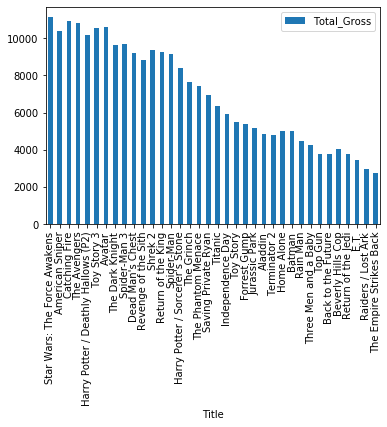

In [64]:
dfmovies.plot(x = 'Title', y= 'Total_Gross', kind = 'bar')

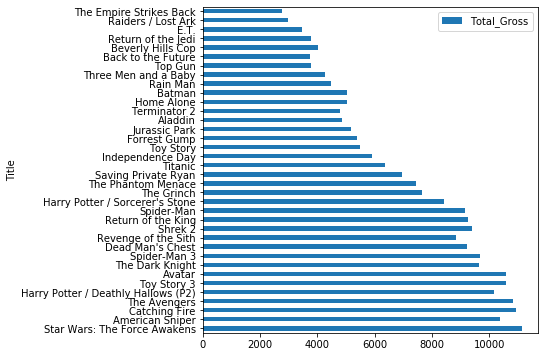

In [66]:
dfmovies.plot(x = 'Title', y= 'Total_Gross', kind = 'barh' , figsize = (6,6))

## Exercise

Now it's your turn to do some exercises and get familiar with Python. First, you are going to answer some questions about the movies dataset we already explored:

1. Get a quick statistical profile of Total_Gross column?

In [73]:
#Your code here
totalgross = dfmovies['Total_Gross']
totalgross.describe()


count       36.000000
mean      6984.169444
std       2738.850447
min       2749.000000
25%       4717.000000
50%       6657.450000
75%       9443.050000
max      11128.500000
Name: Total_Gross, dtype: float64

2. Get the summary statistics (mean,max,min,std) of Total_Gross for movies that were highest grossing movie of the year during 1985 - 1995

In [71]:
#Your code here

data= dfmovies[(dfmovies['Year']>1984) & (dfmovies['Year']<1996)]['Total_Gross']
print(data.describe())

count      11.000000
mean     4728.345455
std       598.228373
min      3749.200000
25%      4355.650000
50%      4871.000000
75%      5093.800000
max      5493.500000
Name: Total_Gross, dtype: float64


3. Do the same thing for movies during 2005-2015 period

In [72]:
#Your code here
data = dfmovies[(dfmovies['Year']>2004) & (dfmovies['Year']<2016)]['Total_Gross']
print(data.describe())

count       11.000000
mean     10175.472727
std        744.507534
min       8840.500000
25%       9647.250000
50%      10360.800000
75%      10716.450000
max      11128.500000
Name: Total_Gross, dtype: float64


What are some insights you gain from this comparison?

The mean is much higher for movies from 2004 and 2016.Min value is greater than the max value from 1985-1996.The data is clustered across the mean for both year ranges. There aren't a lot of outliers

4. Show the relationship between Total_Gross and year by choosing a proper plot

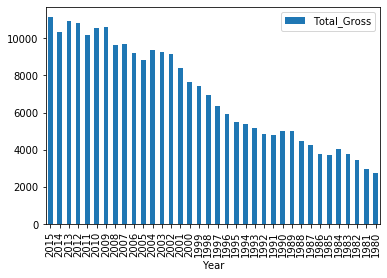

In [79]:
#Your code here
dfmovies.plot(x='Year',y='Total_Gross',kind = 'bar')

Let's look at  _ClassifyRisk_ dataset. 

In [81]:
df = pd.read_csv('Risk.csv')

df.head(10)

,ID,AGE,INCOME,GENDER,MARITAL,NUMKIDS,NUMCARDS,HOWPAID,MORTGAGE,STORECAR,LOANS,RISK
0,100756,44,59944,m,married,1,2,monthly,y,2,0,good risk
1,100668,35,59692,m,married,1,1,monthly,y,1,0,bad loss
2,100418,34,59508,m,married,1,1,monthly,y,2,1,good risk
3,100416,34,59463,m,married,0,2,monthly,y,1,1,bad loss
4,100590,39,59393,f,married,0,2,monthly,y,1,0,good risk
5,100657,41,59276,m,married,1,2,monthly,y,1,1,good risk
6,100702,42,59201,m,married,0,1,monthly,y,2,0,good risk
7,100319,31,59193,f,married,1,2,monthly,y,1,1,good risk
8,100666,28,59179,m,married,1,1,monthly,y,2,1,bad loss
9,100389,30,59036,m,married,1,1,monthly,y,2,1,good risk


In [82]:
df.describe()

,ID,AGE,INCOME,NUMKIDS,NUMCARDS,STORECAR,LOANS
count,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000
mean,102059.000000,31.819529,25580.211805,1.452514,2.429439,2.515910,1.375759
std,1188.619858,9.876729,8766.867219,1.170579,1.880721,1.352768,0.838183
min,100001.000000,18.000000,15005.000000,0.000000,0.000000,0.000000,0.000000
25%,101030.000000,23.000000,20497.000000,1.000000,1.000000,1.000000,1.000000
50%,102059.000000,31.000000,23490.000000,1.000000,2.000000,2.000000,1.000000
75%,103088.000000,41.000000,27566.000000,2.000000,4.000000,3.000000,2.000000
max,104117.000000,50.000000,59944.000000,4.000000,6.000000,5.000000,3.000000


Many datasets contain missing data. pandas isnull( ) functions allows us to determine whether our columns contain missing values or not

In [83]:
#finding columns with missing values

df.isnull().sum()

ID          0
AGE         0
INCOME      0
GENDER      0
MARITAL     0
NUMKIDS     0
NUMCARDS    0
HOWPAID     0
MORTGAGE    0
STORECAR    0
LOANS       0
RISK        0
dtype: int64

#### Getting unique value lists and counts

We can get the unique values and their counts

In [84]:
#unique values per column
df['NUMKIDS'].unique()

array([1, 0, 2, 3, 4])

In [85]:
# frequency of values 

df['NUMKIDS'].value_counts()

1    1329
2    1062
0     981
3     453
4     292
Name: NUMKIDS, dtype: int64

In [86]:
#by defualt frequency is sort by value, if you want to sort by index

df['NUMKIDS'].value_counts().sort_index()

0     981
1    1329
2    1062
3     453
4     292
Name: NUMKIDS, dtype: int64

__groupby__ is a useful function for data aggregation and slicing.

In [89]:
df.groupby('AGE')['INCOME'].mean()

AGE
18    21098.008264
19    20998.496454
20    21005.610879
21    21068.696581
22    20854.904382
23    21569.061674
24    20867.337449
25    21625.469298
26    24236.238806
27    24220.876712
28    26735.454545
29    26223.716667
30    30301.160377
31    31302.962500
32    30329.663265
33    32181.627451
34    32587.542553
35    32795.802326
36    32123.876106
37    31972.261682
38    30895.403509
39    41632.280000
40    27036.318966
41    29381.360294
42    28821.141667
43    27388.157480
44    28991.254902
45    28024.741935
46    23705.864198
47    24210.936842
48    23040.795699
49    24106.574713
50    23980.282353
Name: INCOME, dtype: float64

In [ ]:
df.groupby('NUMKIDS')['AGE'].mean()

In [ ]:
df.groupby('MARITAL')['NUMKIDS'].describe().unstack()

## Exercise

Now it's your turn to explore Risk dataset and answer the follwoing questions:

1. Find the minimum and maximum values of income

In [88]:
#Your code here

Max = df['INCOME'].max()
Min = df['INCOME'].min()
print(f'Max:{Max}, Min: {Min}')

Max:59944, Min: 15005


2. Find the mean income based on gender

In [92]:
df.groupby('GENDER')['INCOME'].mean()

GENDER
f    25370.143958
m    25794.089706
Name: INCOME, dtype: float64

3. Draw the histogram of income distribution based on gender

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11312c110>,
      dtype=object)

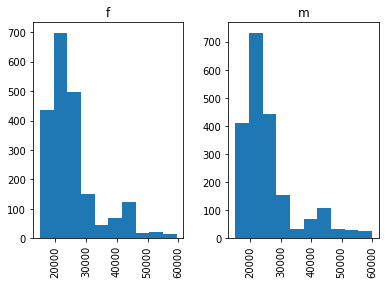

In [95]:
df.hist(column='INCOME',by='GENDER')

4. Think about the datasets at hand. Come up with some questions and try to analyze the data and answer them. If needed, draw some plots. You should explore the columns and try to find insights based on the data. 
You need to come up with 3 questions and show your anlysis.